# 딥 러닝을 이용한 자연어 처리 입문

아래 링크의 E-book을 보고 실습한 내용입니다.

WikiDocs 주소: https://wikidocs.net/31766

# 7장 머신 러닝 개요

## 4절 자동 미분과 선형 회귀 실습

## 식 $2w^2 + 5$을 $w$에 대하여 미분하는 예제

### Tensorflow 구현

In [1]:
import tensorflow as tf


# tf.Variable을 이용하여 학습 가능한 파라미터 w 선언
w = tf.Variable(2.)

# 파라미터 w를 이용하여 식 f(w) = 2w^2 + 5 표현
def f(w):
    y = w ** 2
    z = 2*y + 5
    return z

2021-11-22 04:04:12.092723: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2021-11-22 04:04:12.092813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (91f72fdd3418): /proc/driver/nvidia/version does not exist
2021-11-22 04:04:12.093200: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# GradientTape을 활용하여 w에 미분값이 저장되었음을 확인
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [3]:
# 임의의 가중치와 편향 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)


# 가설 함수 선언
@tf.function
def hypothesis(x):
    return W*x + b


x_test = [1, 1.5, 3, 6, 10, 4.5]
print(f"가설 함수 출력 결과: {hypothesis(x_test).numpy()}")

가설 함수 출력 결과: [ 5.  7. 13. 25. 41. 19.]


In [4]:
# MSE 함수
@tf.function
def mse_loss(y_pred, y):
    # (예측값 - 실제값)^2 의 평균
    return tf.reduce_mean(tf.square(y_pred - y))


X = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]  # 각 공부하는 시간에 맵핑되는 성적

# 최적화 알고리즘: 경사 하강법, 학습률 0.01
optimizer = tf.optimizers.SGD(0.01)

# 학습 진행
for i in range(301):
		# 계산 과정 GradientTape에 기록
    with tf.GradientTape() as tape:
        y_pred = hypothesis(X)
        cost = mse_loss(y_pred, y)
		# 오류 역전파 알고리즘을 통해 오차에 대한 미분값 계산
    gradients = tape.gradient(cost, [W, b])
		# 학습 가능한 파라미터들에 계산된 미분값 적용
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if i % 10 == 0:
        print(f"epoch: {i:3} | W: {W.numpy():5.4f} | b: {b.numpy():5.4} | cost: {cost:5.6f}")

epoch:   0 | W: 8.2133 | b: 1.664 | cost: 1402.555542
epoch:  10 | W: 10.4971 | b: 1.977 | cost: 1.351182
epoch:  20 | W: 10.5047 | b:  1.93 | cost: 1.328165
epoch:  30 | W: 10.5119 | b: 1.884 | cost: 1.306967
epoch:  40 | W: 10.5188 | b: 1.841 | cost: 1.287436
epoch:  50 | W: 10.5254 | b: 1.799 | cost: 1.269459
epoch:  60 | W: 10.5318 | b: 1.759 | cost: 1.252898
epoch:  70 | W: 10.5379 | b: 1.721 | cost: 1.237644
epoch:  80 | W: 10.5438 | b: 1.684 | cost: 1.223598
epoch:  90 | W: 10.5494 | b: 1.648 | cost: 1.210658
epoch: 100 | W: 10.5548 | b: 1.614 | cost: 1.198740
epoch: 110 | W: 10.5600 | b: 1.582 | cost: 1.187767
epoch: 120 | W: 10.5650 | b:  1.55 | cost: 1.177665
epoch: 130 | W: 10.5697 | b:  1.52 | cost: 1.168354
epoch: 140 | W: 10.5743 | b: 1.492 | cost: 1.159782
epoch: 150 | W: 10.5787 | b: 1.464 | cost: 1.151890
epoch: 160 | W: 10.5829 | b: 1.437 | cost: 1.144619
epoch: 170 | W: 10.5870 | b: 1.412 | cost: 1.137924
epoch: 180 | W: 10.5909 | b: 1.387 | cost: 1.131752
epoch: 190

In [5]:
# 임의의 값을 넣어 출력되는 결과 확인
x_test = [3.5, 5, 5.5, 6]
print("임의의 입력에 대한 출력:", hypothesis(x_test).numpy())

임의의 입력에 대한 출력: [38.35479  54.295143 59.608593 64.92204 ]


### Keras 구현

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입, 출력 차원이 1인 선형 레이어를 만들어준다.
model.add(Dense(1, input_dim=1, activation='linear'))

# 학습률 0.01로 optimizer SGD를 선언해준다.
sgd = optimizers.SGD(lr=0.01)

# 비용 함수로는 MSE를 사용한다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 학습 진행
model.fit(X, y, epochs=300)

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 407ms/step - loss: 3286.3240 - mse: 3286.3240
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 405.3965 - mse: 405.3965
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 50.9190 - mse: 50.9190
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 7.3023 - mse: 7.3023
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.9347 - mse: 1.9347
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2734 - mse: 1.2734
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1912 - mse: 1.1912
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1802 - mse: 1.1802
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1780 - mse: 1.1780
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1768 - mse: 1.1768
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 1.175

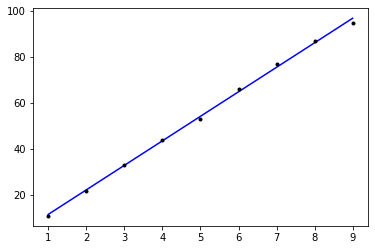

In [7]:
# 학습된 모델이 그리는 최적화된 직선
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

In [8]:
# 학습 데이터에 없던 데이터 예측
print("예측값:", model.predict([9.5]))

예측값: [[102.182526]]
